## Introduction

Electricity is a basic human in need and with incresing digitization, the demand for electricity as a commodity is exponentially increasing. Hence it is imperative that energy be made available to people at as low a cost as possible. This is easier said than done however. Electricity price is primarly a function of load, demand and a host of other dynamic factors. This can cause the price of electricity to fluctuate widely. Hence there is a need for a reliable forecasting model that can predict the price. Such a model can be helpful to utilities and consumers schedule their energy consumption to a great extent. 

The goal of this project is to analyze the hourly energy data along with the hourly weather data for 5 major cities in Spain- Barcelona, Madrid, Seville, Valencia and Bilbao and eventually predict the price of energy for the next hour as a function of the previous prices and weather data.

We start by doing an EDA of the data sources and getting some useful insights before we actually go on to building a price forecasting model. The goal of this notebook is to carry out this task.

In [3]:
# Importing the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline

## Loading the data

We start by loading the data sets and getting a preview of the features. The two data sets are stored as :
1) energy_dataset.csv

2) weather_features.csv

In [4]:
warnings.simplefilter(action = 'ignore', category = (FutureWarning, UserWarning))

In [8]:
# loading the energy dataset
energy_df = pd.read_csv('energy_dataset.csv', parse_dates = ['time'])

In [9]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [10]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [11]:
# loading the weather dataset
weather_df = pd.read_csv('weather_features.csv', parse_dates = ['dt_iso'])

In [12]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

Shifting focus back to the energy_df dataframe

We see thata a few columns are either 0 or NaN. These columns are of no use to us and hence we drop them.


In [14]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [15]:
energy_df.drop(columns = ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'],
               axis = 1, inplace = True)

In [17]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [21]:
# removing columns with zero values

df_0 = energy_df[energy_df == 0]
df_0.head()


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         0 non-null      object 
 1   generation biomass                           4 non-null      float64
 2   generation fossil brown coal/lignite         10517 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        1 non-null      float64
 5   generation fossil hard coal                  3 non-null      float64
 6   generation fossil oil                        3 non-null      float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

We see quite a few columns with huge number of rows that have zero values. These can be dropped. Similarly, we can get rid of columns that are concerned with energy forecase for the day ahead since they dont help in forecasting energy price

In [23]:
energy_df.drop(columns = ['generation fossil coal-derived gas', 'generation fossil oil shale', 
                         'generation fossil peat', 'generation geothermal','generation marine',
                          'generation wind offshore','forecast solar day ahead',
                          'forecast wind onshore day ahead', 
                          'total load forecast'], axis = 1, inplace = True)

In [24]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

We see that the 'time' column has been parse as an object. Since the goal of this anaysis is to do a time series analysis, we will go ahead and make the 'time' column as the index of the dataframe.

In [26]:
energy_df['time'] = pd.to_datetime(energy_df['time'], utc = True, infer_datetime_format = True)
energy_df = energy_df.set_index('time')

In [27]:
# locating missing values and any duplicates

duplicate = energy_df.duplicated(keep = 'first').sum()
print('There are {} duplicated rows in thge energy data set'.format(duplicate))

There are 0 duplicated rows in thge energy data set


In [29]:
null = energy_df.isnull().values.sum()

print('There are {} null values in the energy data set'.format(null))

There are 292 null values in the energy data set


We see that the energy data set has some missing values. For a time series, it makes more sense to interpolate these values rather than drop it altogether, as this creates missing points in our time series. Lets see what we can do to deduce these values. 

In [31]:
energy_df.isnull().sum(axis = 0)

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

Note that the price column(our target variable) has zero missing values.  The 'total load actual' column has the maximum missing values. The rest of the columns have similar missing values, indictating the possibility that they are all in the same rows.

Since we anticipate plotting quite a few time series, it makes sense to create a function for this purpose.

In [34]:
# fucntion
def plot_data(df = None, col = None, series = pd.Series([]),
             label = None, ylabel = None, title = None, start = 0, end = None):
    """ This function plots a certain column in a dataframe or a series as time series data """
    sns.set()
    fig, ax = plt.subplots(figsize = (30, 10))
    ax.set_xlabel('Time', fontsize = 16)
    if col:
        ax.plot(df[col][start:end], label = label)
        ax.set_ylabel(ylabel, fontsize = 16)
        
    if series.any():
        ax.plot(series, label = label)
        ax.set_ylabel(ylabel, fontsize = 16)
        
    if label:
        ax.legend(fontsize = 16)
    
    if title:
        ax.set_title(title, fontsize = 24)
        
    ax.grid(True)
    
    return ax
    

<ipython-input-34-116fc3ccfca5>:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_data(df = None, col = None, series = pd.Series([]),


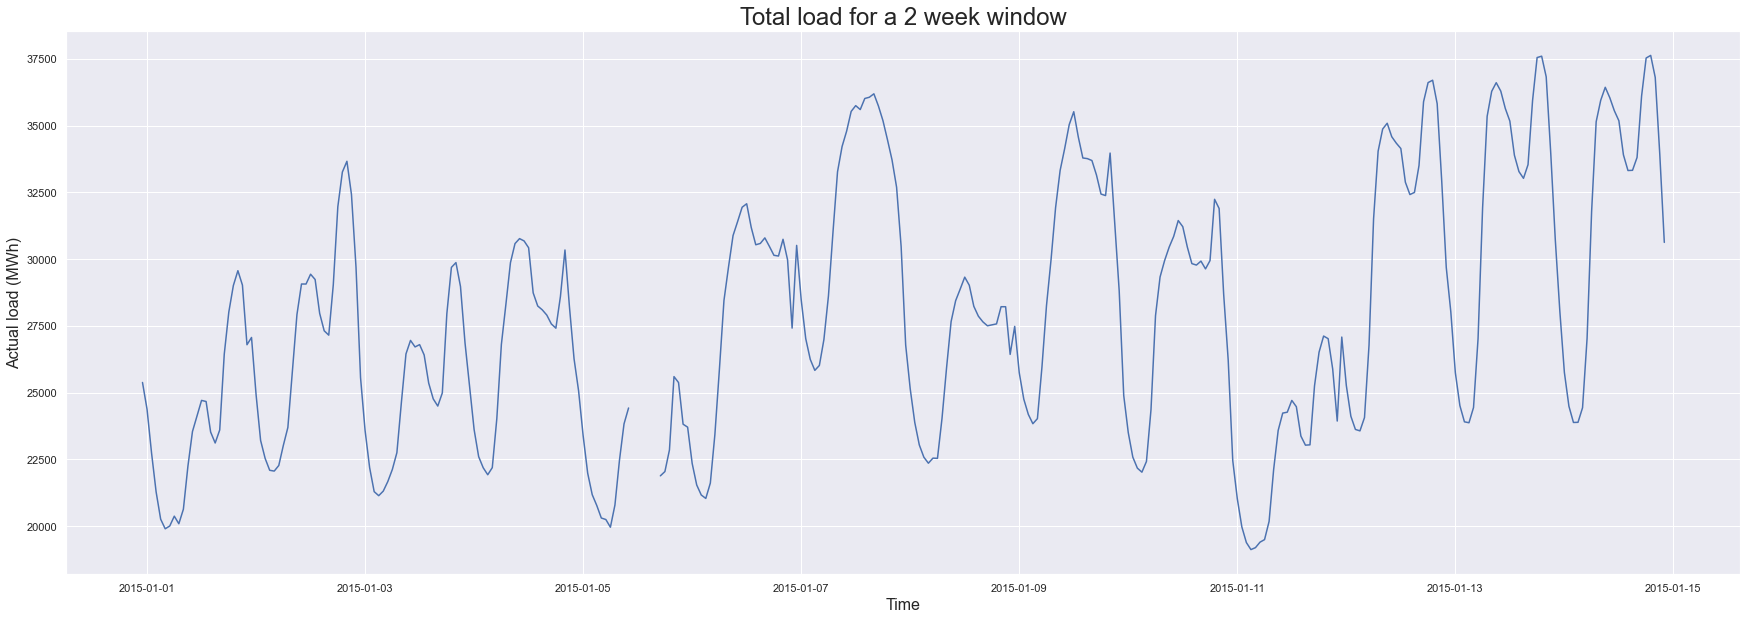

In [35]:
ax = plot_data(df = energy_df, col = 'total load actual', ylabel = 'Actual load (MWh)', end = 24 * 7 * 2, 
              title = 'Total load for a 2 week window')
plt.show()

Notice the break in the time series between 2015-01-05 to 2015-01-07. However looking at the time series behavior we can conclude that the data for those missing values can be interpolated. 

Before we go about interpolating, lets have a look at the other columns with missing data. It might be worth checking if the columns with missing values have them all missing in the same rows. 

In [36]:
null_df = energy_df[energy_df.isnull().any(axis = 1)]

In [38]:
null_df.sample(10)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2015-02-01 13:00:00+00:00,400.0,317.0,5266.0,5995.0,327.0,0.0,1216.0,4412.0,7098.0,42.0,79.0,3701.0,199.0,1345.0,NaN,58.69,24.10
2015-10-02 09:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.09,70.49
2016-04-25 05:00:00+00:00,206.0,0.0,3673.0,1143.0,185.0,162.0,1648.0,6807.0,7095.0,51.0,62.0,283.0,214.0,5682.0,NaN,32.97,40.18
2015-01-05 12:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.80,73.95
2015-02-01 11:00:00+00:00,405.0,317.0,5247.0,6008.0,333.0,0.0,1119.0,4416.0,7095.0,42.0,72.0,3817.0,200.0,1413.0,NaN,59.97,22.51
2015-04-23 19:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.49,82.57
2015-01-05 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.00,71.85
2016-06-11 23:00:00+00:00,356.0,595.0,5719.0,6165.0,274.0,382.0,NaN,1325.0,5056.0,56.0,86.0,30.0,291.0,2019.0,24155.0,60.23,48.72
2015-01-05 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.60,80.53


A quick sample shows that the columns with generation information are the ones with missing data and they are all missing in the same rows.

In [39]:
# filling null values with interpolated values
energy_df = energy_df.interpolate(method = 'linear', limit_direction = 'forward', axis = 0)

In [43]:
# looking at the null values after interpolating
energy_df.isnull().sum()

generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind onshore                        0
total load actual                              0
price day ahead                                0
price actual                                   0
dtype: int64

We see that all columns have no null vaues in them. Thus we have been able to successfully clean the energy dataset. Lets now analyse the weather dataset

## Weather dataset

In [44]:
weather_df.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [45]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

The good thing to note here is that all columns have non null values and the same number of rows. 

In [46]:
weather_df.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


Soime interesting points to highlight here: 

- The temperature is in Kelvin
- The max pressure is of the order of 10^6 which is not possible on the surface of the earth, and is hence an outlier 
- The max wind speed is 133 m/s which is again an outlier. Such wind speeds are comparable to those of hurricanes and tornadoes and such an event has not been recorded in Spain around that time. So that value is an outlier.
- The 'rain_1h' column shows the rainfall value for last 1 hour in mm and the rain_3h does the same but for the last 3 hours instead. However the mean for the 3 hour window is less than the the 1 hour window which is odd. This needs further inspection

In [48]:
# setting the time column as the index as in the energy data frame
weather_df['time'] = pd.to_datetime(weather_df['dt_iso'], utc = True, infer_datetime_format = True)
weather_df.drop(['dt_iso'], axis = 1, inplace = True)
weather_df = weather_df.set_index('time')

In [49]:
# converting all int64 columns to float64 for consistency
int_cols = weather_df.select_dtypes(include = [np.int64]).columns

for col in int_cols:
    weather_df[col] = weather_df[col].values.astype(np.float64)

In [50]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178396 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            178396 non-null  object 
 1   temp                 178396 non-null  float64
 2   temp_min             178396 non-null  float64
 3   temp_max             178396 non-null  float64
 4   pressure             178396 non-null  float64
 5   humidity             178396 non-null  float64
 6   wind_speed           178396 non-null  float64
 7   wind_deg             178396 non-null  float64
 8   rain_1h              178396 non-null  float64
 9   rain_3h              178396 non-null  float64
 10  snow_3h              178396 non-null  float64
 11  clouds_all           178396 non-null  float64
 12  weather_id           178396 non-null  float64
 13  weather_main         178396 non-null  object 
 14  weather_description  1

In [51]:
weather_df.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


The above data is shown for each city individually. Lets have a look at mean data for each column based on city. We do a groupby for this. 

In [52]:
weather_by_city = weather_df.groupby('city_name').mean()
weather_by_city.head()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
city_name,,,,,,,,,,,,
Barcelona,289.848248,288.594704,291.021987,1284.010486,73.994221,2.786588,187.188043,0.117079,0.000327,0.000000,23.229648,760.917465
Bilbao,286.378489,284.916661,288.036687,1017.567439,79.089455,1.957470,159.883536,0.123493,0.001034,0.023455,43.960697,723.943228
Madrid,288.061071,286.824877,289.155600,1011.838448,59.776932,2.441696,173.293159,0.055083,0.000129,0.000029,22.397028,762.260264
Seville,293.105431,291.184103,295.962431,1018.504711,64.140732,2.483787,151.757179,0.045392,0.000180,0.000000,14.748770,771.409849
Valencia,290.780780,290.222277,291.355025,1015.973794,65.145113,2.692815,160.753820,0.035924,0.000226,0.000154,20.820999,781.228283


In [55]:
# checking for null values and duplicate values as before

weather_duplicate = weather_df.duplicated(keep = 'first').sum()
print('Number of duplicate rows in weather data set are {}'.format(weather_duplicate))

Number of duplicate rows in weather data set are 8622


In [57]:
weather_null = weather_df.isnull().values.sum()
print('Number of null rows in weather dataset are {}'.format(weather_null))

Number of null rows in weather dataset are 0


The duplicate count essentially shows all those rows that have the exact same values. However we are more concerend that no two rows have the same row index, for the same city. It is acceptable for different cities to have the same hour index. 
We are essentially trying to remove the duplicates within the same same city for a speific time index in order to do a smooth merge between the weather and energy data sets.

In [59]:
# Lets take a look at the length of number of rows for each city

cities = weather_df['city_name'].unique()

weather_cities = weather_df.groupby('city_name')

for city in cities:
    observations = weather_cities.get_group(city).shape[0]
    print('There are {} rows'.format(observations), 'for city: {}'.format(city))
    
print('There are {} observations in the energy data set'.format(energy_df.shape[0]))

There are 35145 rows for city: Valencia
There are 36267 rows for city: Madrid
There are 35951 rows for city: Bilbao
There are 35476 rows for city:  Barcelona
There are 35557 rows for city: Seville
There are 35064 observations in the energy data set


Looking at the values we can see that the number of observations for each city is close to the energy data set, but not the same. A little more work needs to be done. 

In [62]:
# As an alterntive creating a second dataset that only keeps the second of the duplicates
weather_df2 = weather_df.reset_index()
weather_df2 = weather_df2.drop_duplicates(subset = ['time', 'city_name'], keep = 'last')
weather_df2 = weather_df2.set_index('time')

weather_df = weather_df.reset_index()
weather_df = weather_df.drop_duplicates(subset = ['time', 'city_name'], keep = 'first')
weather_df = weather_df.set_index('time')

In [64]:
# Looking at the number of rows after droping duplicates
weather_cities = weather_df.groupby('city_name')

for city in cities:
    observations = weather_cities.get_group(city).shape[0]
    print('There are {} rows'.format(observations), 'for city {}'.format(city))
    
print('There are {} observations in the energy data set'.format(energy_df.shape[0]))

There are 35064 rows for city Valencia
There are 35064 rows for city Madrid
There are 35064 rows for city Bilbao
There are 35064 rows for city  Barcelona
There are 35064 rows for city Seville
There are 35064 observations in the energy data set


In [65]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   level_0              175320 non-null  int64  
 1   index                175320 non-null  int64  
 2   city_name            175320 non-null  object 
 3   temp                 175320 non-null  float64
 4   temp_min             175320 non-null  float64
 5   temp_max             175320 non-null  float64
 6   pressure             175320 non-null  float64
 7   humidity             175320 non-null  float64
 8   wind_speed           175320 non-null  float64
 9   wind_deg             175320 non-null  float64
 10  rain_1h              175320 non-null  float64
 11  rain_3h              175320 non-null  float64
 12  snow_3h              175320 non-null  float64
 13  clouds_all           175320 non-null  float64
 14  weather_id           1

In [66]:
weather_df.head()

,level_0,index,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,0,0,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,1,1,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,2,2,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,3,3,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,4,4,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


Notice the first two columns are irrelavent as is the 'weather_icon' column. Lets drop these. 

In [68]:
weather_df.drop(['level_0', 'index', 'weather_icon'], axis = 1, inplace = True)

In [69]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   city_name            175320 non-null  object 
 1   temp                 175320 non-null  float64
 2   temp_min             175320 non-null  float64
 3   temp_max             175320 non-null  float64
 4   pressure             175320 non-null  float64
 5   humidity             175320 non-null  float64
 6   wind_speed           175320 non-null  float64
 7   wind_deg             175320 non-null  float64
 8   rain_1h              175320 non-null  float64
 9   rain_3h              175320 non-null  float64
 10  snow_3h              175320 non-null  float64
 11  clouds_all           175320 non-null  float64
 12  weather_id           175320 non-null  float64
 13  weather_main         175320 non-null  object 
 14  weather_description  1

Next we focus on the last three columns - weather_id, weather_main, weather_description. 

In [73]:
weather_desc = weather_df['weather_description'].value_counts()
weather_desc

sky is clear                    82670
few clouds                      32099
broken clouds                   17447
scattered clouds                15943
light rain                      10557
moderate rain                    3550
mist                             3060
overcast clouds                  2561
fog                              1919
heavy intensity rain             1139
light intensity drizzle           866
light intensity shower rain       568
proximity shower rain             430
haze                              394
shower rain                       368
proximity thunderstorm            359
dust                              310
thunderstorm                      229
drizzle                           227
light snow                        102
thunderstorm with rain             88
very heavy rain                    78
thunderstorm with light rain       73
heavy intensity shower rain        72
light intensity drizzle rain       54
snow                               35
smoke       

In [74]:
weather_main = weather_df['weather_main'].value_counts()
weather_main

clear           82670
clouds          68050
rain            16767
mist             3060
fog              1919
drizzle          1175
thunderstorm      775
haze              394
dust              312
snow              164
smoke              33
squall              1
Name: weather_main, dtype: int64

In [75]:
weather_id = weather_df['weather_id'].value_counts()
weather_id

800.0    82670
801.0    32099
803.0    17447
802.0    15943
500.0    10557
501.0     3554
701.0     3060
804.0     2561
741.0     1919
502.0     1139
300.0      866
521.0      798
211.0      588
520.0      568
721.0      394
761.0      310
301.0      229
600.0      102
201.0       88
503.0       78
200.0       73
522.0       72
310.0       54
601.0       35
711.0       33
202.0       25
615.0       15
311.0       15
302.0       11
616.0        6
611.0        3
602.0        2
731.0        2
210.0        1
531.0        1
620.0        1
771.0        1
Name: weather_id, dtype: int64

Looking at the unique values above we can see that weather_description and weather_id have roughly the sme distribution while the weatehr_main column does not give us much information. The value counts however shows that there is no direct one to one correspondance in the descriptions and we can drop those columns.

In [76]:
weather_df.drop(['weather_main', 'weather_id', 'weather_description'], axis = 1, inplace = True)

In [77]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city_name   175320 non-null  object 
 1   temp        175320 non-null  float64
 2   temp_min    175320 non-null  float64
 3   temp_max    175320 non-null  float64
 4   pressure    175320 non-null  float64
 5   humidity    175320 non-null  float64
 6   wind_speed  175320 non-null  float64
 7   wind_deg    175320 non-null  float64
 8   rain_1h     175320 non-null  float64
 9   rain_3h     175320 non-null  float64
 10  snow_3h     175320 non-null  float64
 11  clouds_all  175320 non-null  float64
dtypes: float64(11), object(1)
memory usage: 22.4+ MB


In [78]:
weather_df.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all
time,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0


## Treating the outliers

In one of the previous cells above we noted that some of the columns such as pressure and wind speed had some unrealistic values which were probably more like outliers. In this section we take a look at those and decide ehat to do with those values.

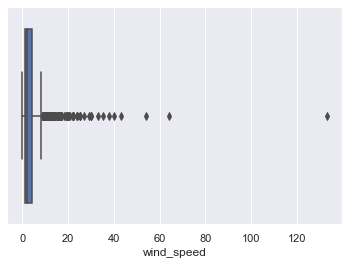

In [79]:
# Visualizing the windspeed

sns.boxplot(x = weather_df['wind_speed'])
plt.show()

We see some outliers here for sure. In order to decide on a valid threshold we look at the typical wind speed and what are the wind speeds during abnormal conditions such as a hurrocane or Tornado. 

https://en.wikipedia.org/wiki/Fujita_scale

The Fujita scale above tells us that speeds above 112 mph or roughly 50 m/s are highly damaging windspeeds. The last time such a wind speed was recoded in Spain was in the year 2012, about two years before the points for this data set was collected

https://en.wikipedia.org/wiki/List_of_European_tornadoes_and_tornado_outbreaks

Hence we set anythign above 50 m/s as an NaN

In [80]:
weather_df.loc[weather_df['wind_speed'] > 50, 'wind_speed'] = np.nan

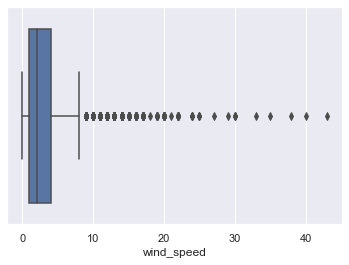

In [81]:
# Plotting the updated dataframe
sns.boxplot(x = weather_df['wind_speed'])
plt.show()

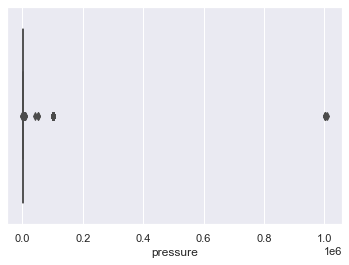

In [82]:
# Visualizing the pressue feature
sns.boxplot(x = weather_df['pressure'])
plt.show()

For pressure, we take the highest and lowest recorded pressure in Spain and set those as thresholds in deciding outliers.

https://en.wikipedia.org/wiki/List_of_atmospheric_pressure_records_in_Europe#Iberia

These values are 1051 hPa and 950 hPa respectively. 

In [83]:
weather_df.loc[weather_df['pressure'] > 1051, 'pressure'] = np.nan
weather_df.loc[weather_df['pressure'] < 950, 'pressure'] = np.nan

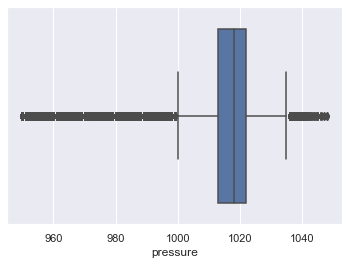

In [84]:
sns.boxplot(x = weather_df['pressure'])
plt.show()

Having set the outliers to NaN we can now interpolate those values from the data set.

In [85]:
weather_df.interpolate(method = 'linear', limit_direction = 'forward', inplace = True, axis = 0)

In [86]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city_name   175320 non-null  object 
 1   temp        175320 non-null  float64
 2   temp_min    175320 non-null  float64
 3   temp_max    175320 non-null  float64
 4   pressure    175320 non-null  float64
 5   humidity    175320 non-null  float64
 6   wind_speed  175320 non-null  float64
 7   wind_deg    175320 non-null  float64
 8   rain_1h     175320 non-null  float64
 9   rain_3h     175320 non-null  float64
 10  snow_3h     175320 non-null  float64
 11  clouds_all  175320 non-null  float64
dtypes: float64(11), object(1)
memory usage: 22.4+ MB


## Merging the two data sets

So far we have cleaned the two data sets, made sure that after grouping the weather dat set by city, we have the same number of rows in each data set, and we have also taken care of the outliers. 
Thus we are now in a position to merge the two data sets. Lets go ahead and do that. 

In [90]:
# Split the weather data sets based on city

c1, c2, c3, c4, c5 = [x for _, x in weather_df.groupby('city_name')]
city_df = [c1, c2, c3, c4, c5]


In [95]:
# Merging with the energy data set

final_df = energy_df

for df in city_df:
    city = df['city_name'].unique()[0]
    city = str('_' + city)
    #print(city)
    df = df.add_suffix(city)
    final_df = final_df.merge(df, on = ['time'], how = 'outer')
    city_name = str('city_name'+ city)
    final_df = final_df.drop([city_name], axis = 1)
    
final_df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_ Barcelona',
       'temp_min_ Barcelona', 'temp_max_ Barcelona', 'pressure_ Barcelona',
       'humidity_ Barcelona', 'wind_speed_ Barcelona', 'wind_deg_ Barcelona',
       'rain_1h_ Barcelona', 'rain_3h_ Barcelona', 'snow_3h_ Barcelona',
       'clouds_all_ Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'rain_3h_Bilbao', 'snow_3h_Bi

In [96]:
final_df.sample(10)

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,...,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia
time,,,,,,,,,,,,,,,,,,,,,
2018-12-17 21:00:00+00:00,290.0,227.0,8791.0,4466.0,306.0,51.0,1386.0,1758.0,6100.0,57.0,...,280.150000,280.150000,1029.0,87.0,2.0,290.0,0.0,0.0,0.0,0.0
2017-01-21 11:00:00+00:00,358.0,641.0,8033.0,5608.0,265.0,0.0,720.0,3714.0,7112.0,59.0,...,285.150000,285.150000,1016.0,58.0,8.0,20.0,0.0,0.0,0.0,75.0
2015-04-07 00:00:00+00:00,469.0,934.0,4758.0,6943.0,340.0,596.0,668.0,1007.0,5985.0,83.0,...,281.522000,281.522000,1023.0,83.0,2.0,56.0,0.0,0.0,0.0,68.0
2018-06-01 05:00:00+00:00,283.0,0.0,4900.0,1945.0,263.0,594.0,1221.0,1428.0,6565.0,53.0,...,289.150000,289.150000,1019.0,87.0,2.0,290.0,0.0,0.0,0.0,20.0
2015-04-24 19:00:00+00:00,404.0,980.0,6235.0,6061.0,400.0,0.0,1040.0,3977.0,6036.0,42.0,...,290.676000,290.676000,983.0,53.0,1.0,154.0,0.0,0.0,0.0,92.0
2016-01-29 10:00:00+00:00,474.0,982.0,6508.0,5823.0,432.0,113.0,1100.0,5766.0,6093.0,84.0,...,284.150000,288.050000,1033.0,87.0,2.0,240.0,0.0,0.0,0.0,40.0
2015-08-05 20:00:00+00:00,449.0,0.0,4749.0,4131.0,353.0,0.0,1309.0,4887.0,4734.0,84.0,...,298.750000,301.150000,1014.0,74.0,2.0,70.0,0.0,0.0,0.0,20.0
2017-12-13 05:00:00+00:00,376.0,859.0,6717.0,5694.0,331.0,1836.0,909.0,387.0,7095.0,49.0,...,273.150000,273.150000,1025.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-31 22:00:00+00:00,457.0,270.0,5613.0,6174.0,255.0,515.0,971.0,1852.0,7099.0,41.0,...,286.037312,286.037312,1026.0,58.0,1.0,119.0,0.0,0.0,0.0,0.0


Having merged the data frames for the energy data set and the weather data for individual cities, we now move on careting some visualizations as part of our EDA.

## Visualizing the time series data

We start by analysing the rain_1h and rain_3h columns. As an example lets analyze it for a specific city


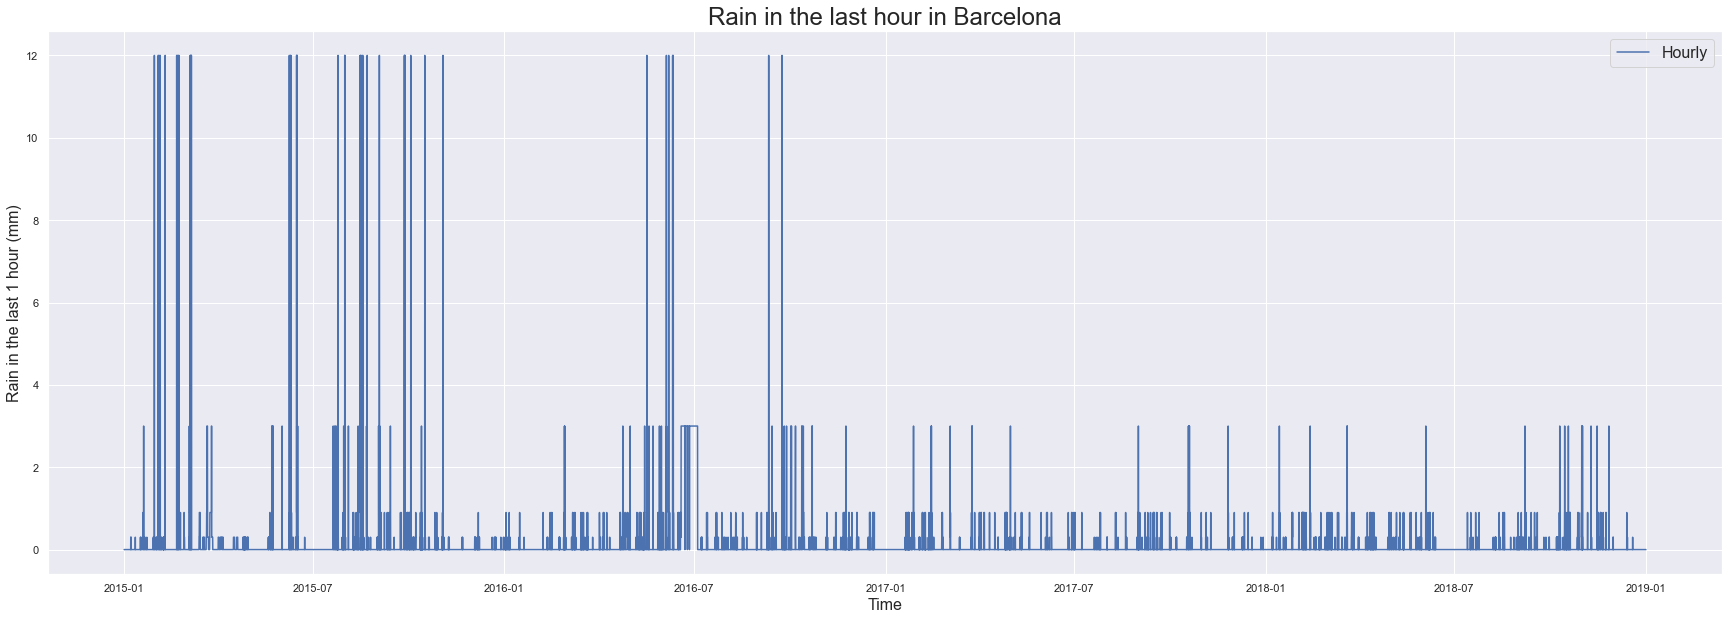

In [100]:
# Plotting for Barcelona for the last 1 hr
plot_data(final_df, col = 'rain_1h_ Barcelona', label = 'Hourly', ylabel = 'Rain in the last 1 hour (mm)', 
         title = 'Rain in the last hour in Barcelona')
plt.show()

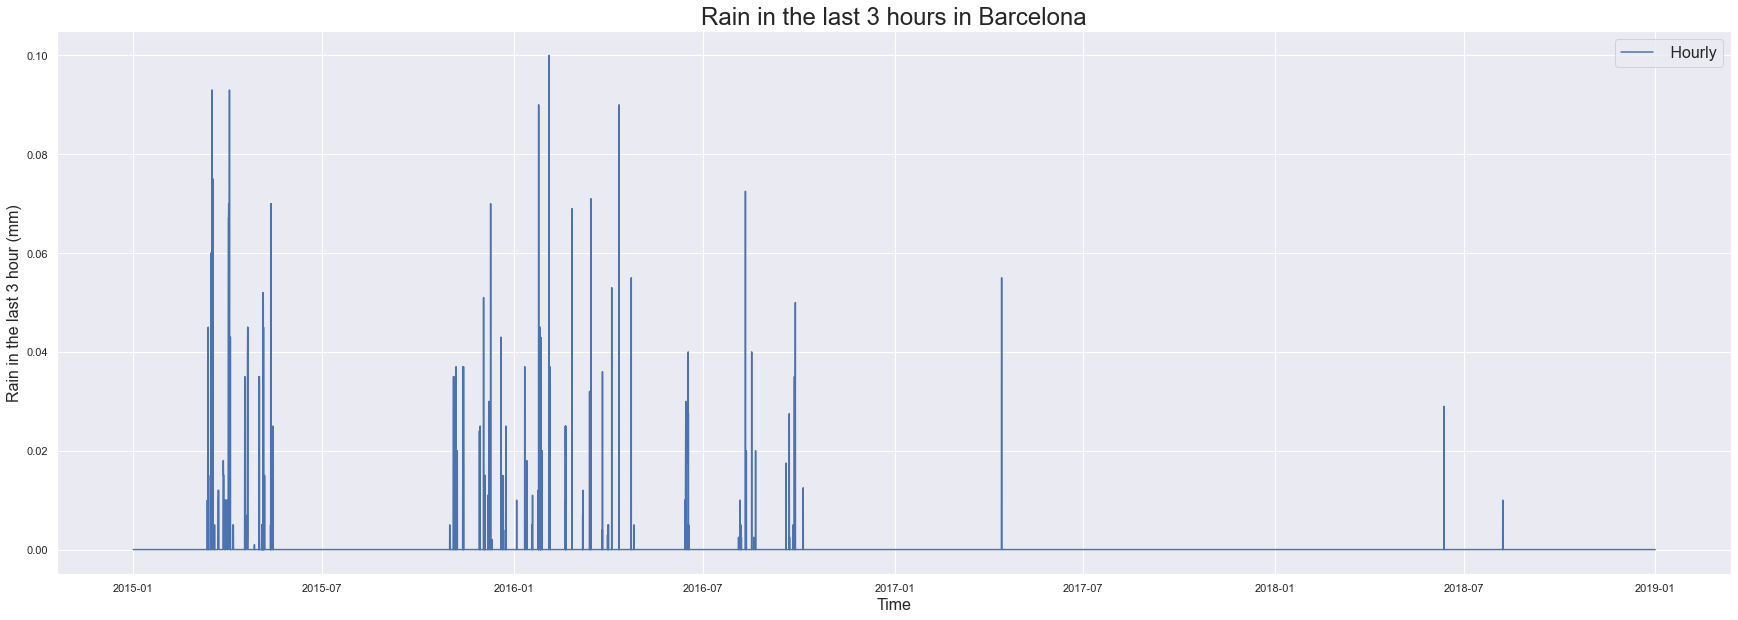

In [101]:
# Plotting for Barcelona for the last 3 hrs
plot_data(final_df, col = 'rain_3h_ Barcelona', label = ' Hourly', ylabel = 'Rain in the last 3 hour (mm)', 
         title = 'Rain in the last 3 hours in Barcelona')
plt.show()

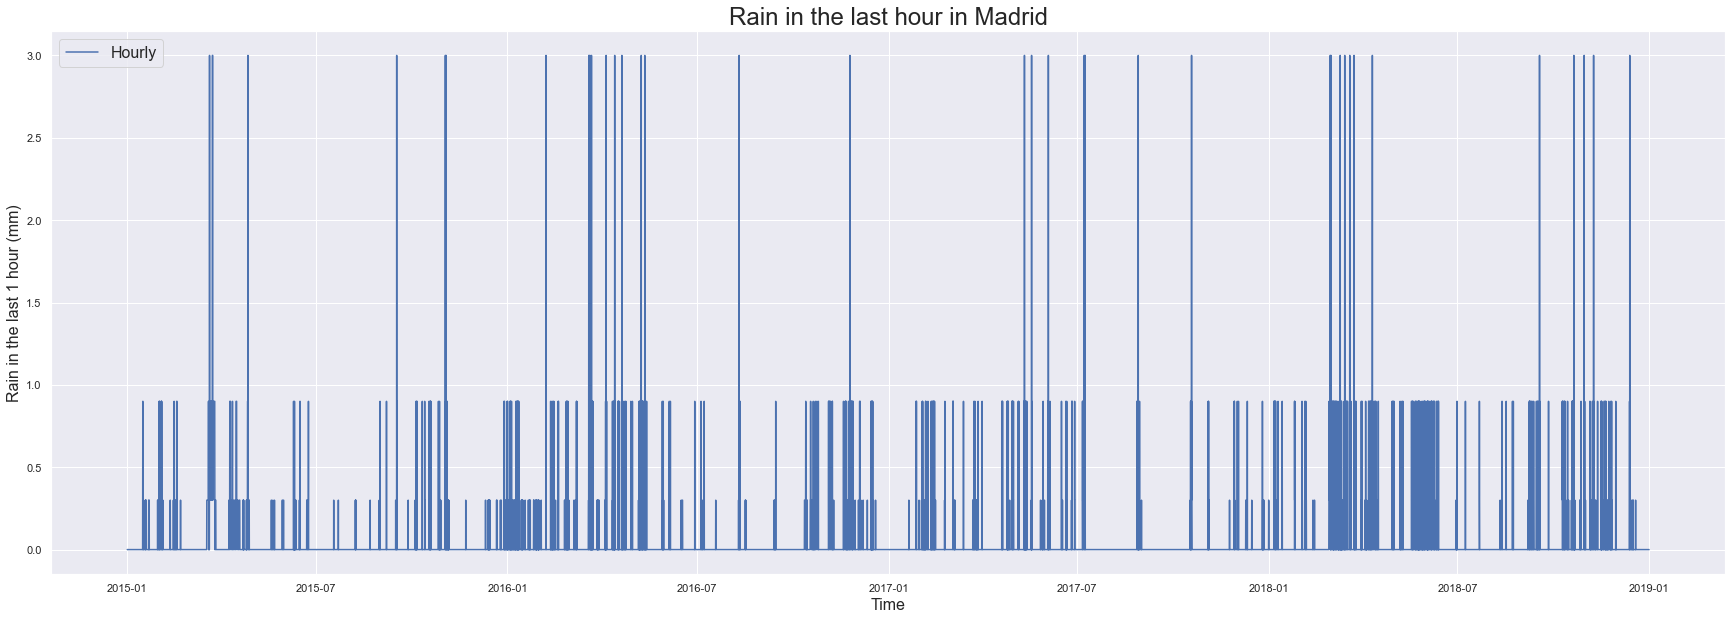

In [102]:
# Plotting for Madrid for the last 1 hr
plot_data(final_df, col = 'rain_1h_Madrid', label = 'Hourly', ylabel = 'Rain in the last 1 hour (mm)', 
         title = 'Rain in the last hour in Madrid')
plt.show()

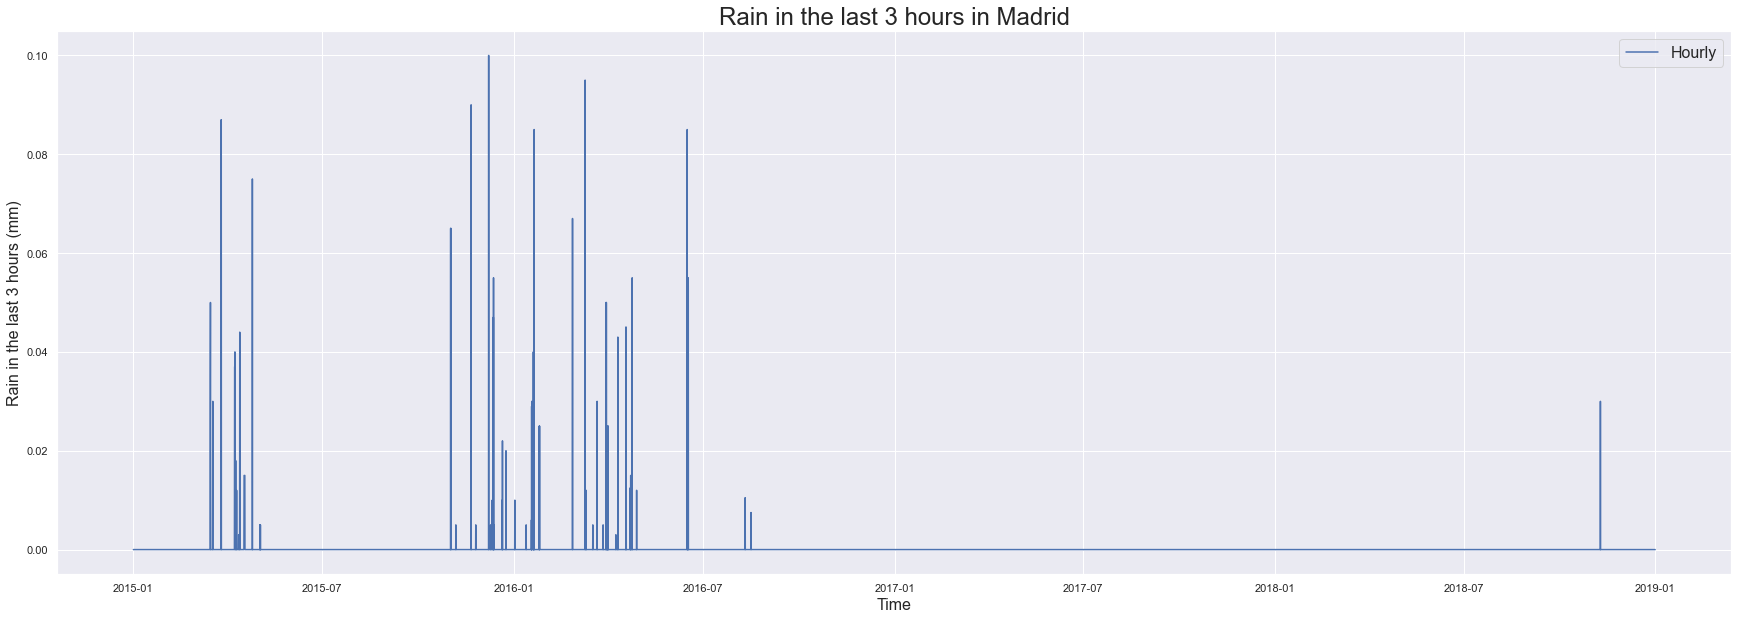

In [103]:
# Plotting for Madrid for the last 3 hrs
plot_data(final_df, col = 'rain_3h_Madrid', label = 'Hourly', ylabel = 'Rain in the last 3 hours (mm)', 
         title = 'Rain in the last 3 hours in Madrid')
plt.show()

It appears that we dont have a lot of reliable data for the rain for the last three hours in the cities, and we can drop these columns without much of a problem.

In [105]:
cities = [' Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for name in cities:
    col_name = str('rain_3h_' + name)
    final_df = final_df.drop([col_name], axis = 1)

In [107]:
final_df.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_ Barcelona',
       'temp_min_ Barcelona', 'temp_max_ Barcelona', 'pressure_ Barcelona',
       'humidity_ Barcelona', 'wind_speed_ Barcelona', 'wind_deg_ Barcelona',
       'rain_1h_ Barcelona', 'snow_3h_ Barcelona', 'clouds_all_ Barcelona',
       'temp_Bilbao', 'temp_min_Bilbao', 'temp_max_Bilbao', 'pressure_Bilbao',
       'humidity_Bilbao', 'wind_speed_Bilbao', 'wind_deg_Bilbao',
       'rain_1h_Bilbao', 'snow_3h_Bilbao', 'clouds_all_Bilbao', 'temp_Madrid',
    

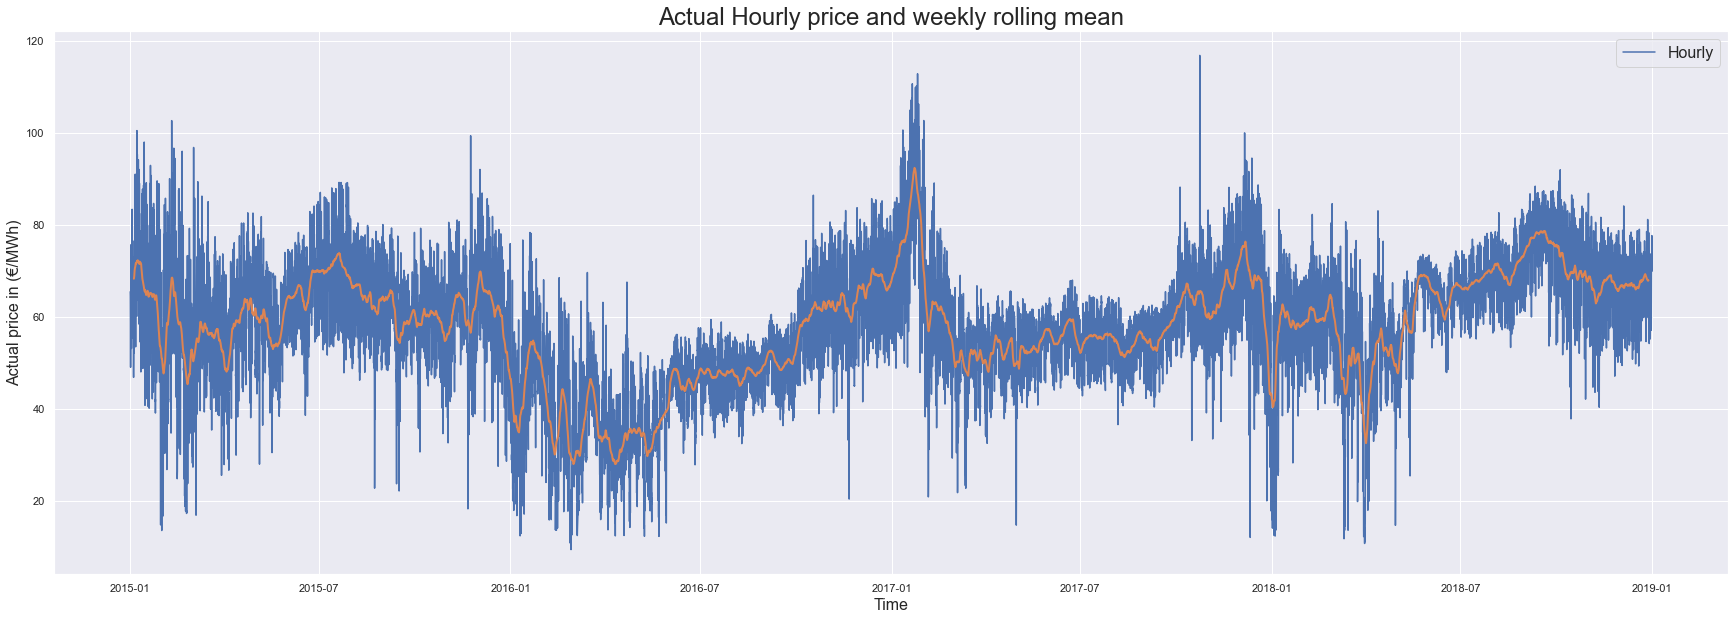

In [108]:
# Plotting the price variation - hourly actual price an the weekly rolling mean

ax = plot_data(final_df, col = 'price actual', label = 'Hourly', ylabel = 'Actual price in (€/MWh)', 
              title = 'Actual Hourly price and weekly rolling mean')

weekly_mean = final_df['price actual'].rolling(window = 24 * 7, center = True).mean()

ax.plot(weekly_mean, linestyle='-', linewidth=2, label='Weekly rolling mean')

plt.show()


## Plotting monthly price and the one year lagged series

Lets plot the monthly price and its one year lagged series to see for any seasonality

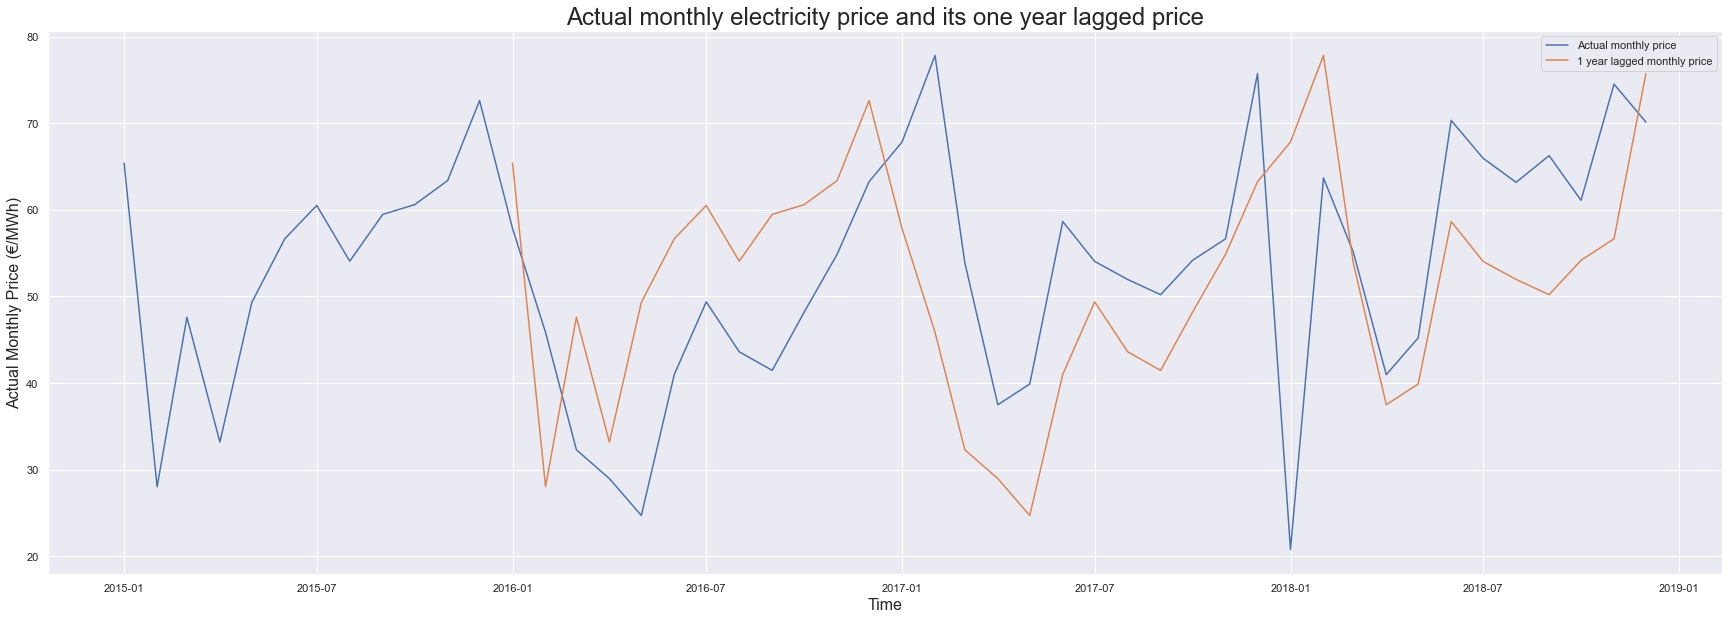

In [115]:
price_monthly = final_df['price actual'].asfreq('M')
ax = plot_data(series = price_monthly, ylabel = 'Actual Monthly Price (€/MWh)', 
              title = 'Actual monthly electricity price and its one year lagged price')

monthly_shifted = final_df['price actual'].asfreq('M').shift(12)

ax.plot(monthly_shifted, label = 'Monthly')
ax.legend(['Actual monthly price', '1 year lagged monthly price'])
plt.show()

Looking at the monthly price and its one year lagged monthly pirce, we see some trends in the crest and peaks of the price. This implies a seasonality behavior in our data, on a monthly scale. 
Next lets plot the data on a weekly scale

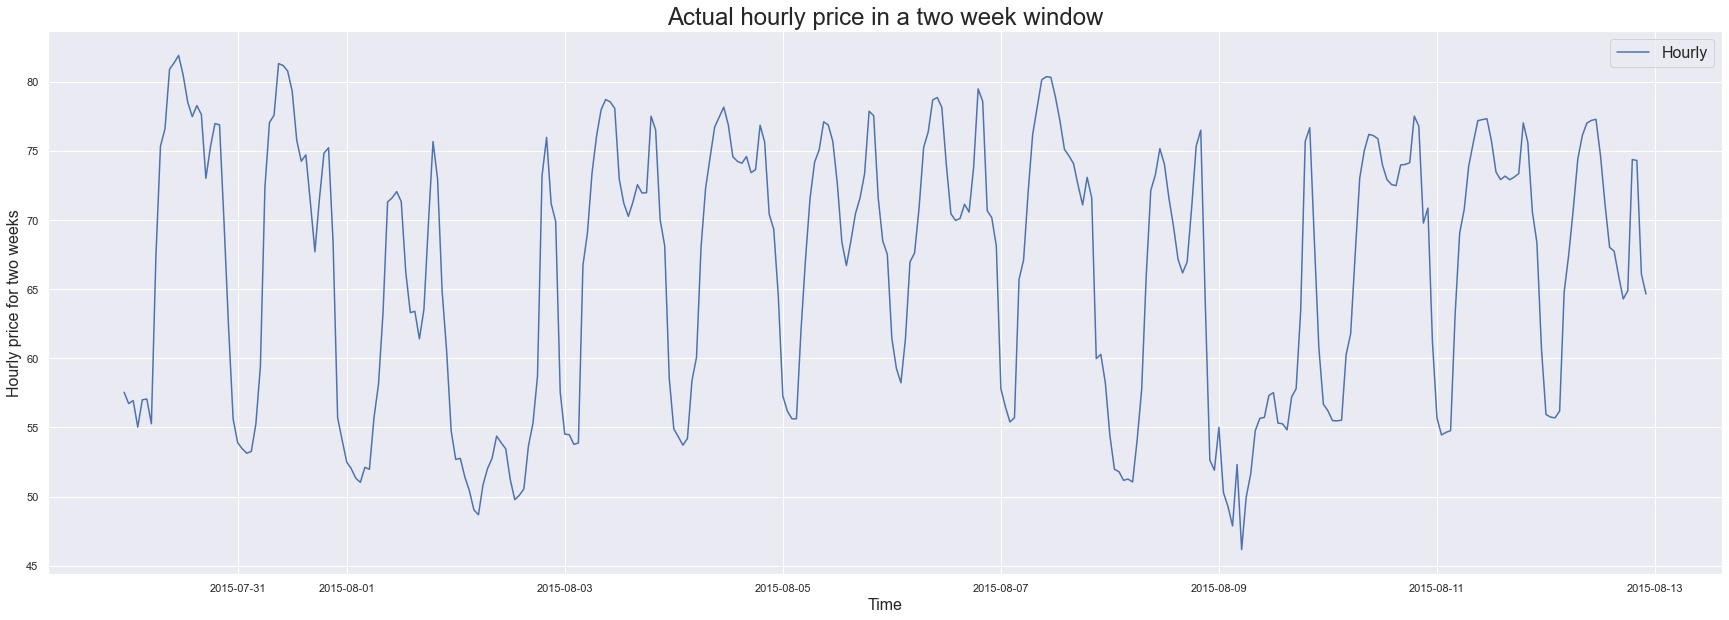

In [123]:
# Plotting the price on a weekly basis for a two week window
ax = plot_data(final_df, col = 'price actual', label= 'Hourly', ylabel = 'Hourly price for two weeks', 
              start = (24*7*30) , end = (24*7*32), 
               title = 'Actual hourly price in a two week window')
plt.show()

Some observations to note : 
- On a daily basis we can see a cyclical pattern in the price. As the day progresses the price increases and goes low towards the end of the day. 
- Even within the day we can see a pattern. This is probably due to 'Siesta' that is very common in Spanish culture.
- Even on a weekly basis we can notice a pattern. From 2015-07-31 to 2015-08-06 and 2015-08-07 to 2015-08-13 we can see a similar cariation in price.

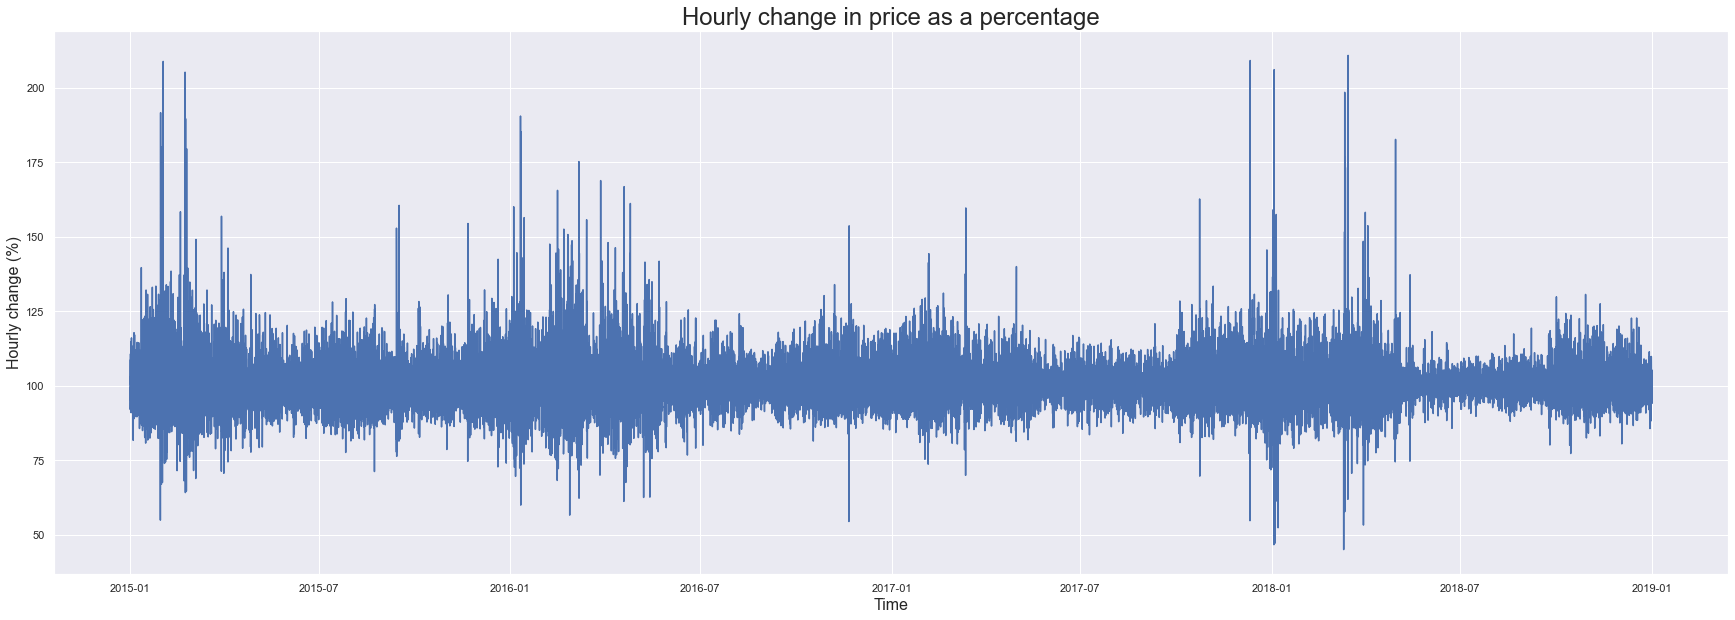

In [124]:
# Observing hourly change in price
pct_change = (energy_df['price actual'].div(energy_df['price actual'].shift(1))) * 100

ax = plot_data(series = pct_change, ylabel = 'Hourly change (%)', 
              title = 'Hourly change in price as a percentage')
plt.show()


Note from the plot above that with the exception of a few points, typical change in hourly price is on an average  + / - 25%

<AxesSubplot:ylabel='Frequency'>

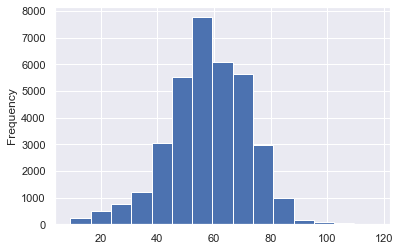

In [125]:
# plotting a distribution of the price
energy_df['price actual'].plot.hist(bins = 15)

The price distribution seems to follow a normal distribution. Next up we analyze the time series for stationarity as this is essential for us to be able to do any kind of machine learning in the future.

 ## Decomposing the time series

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose

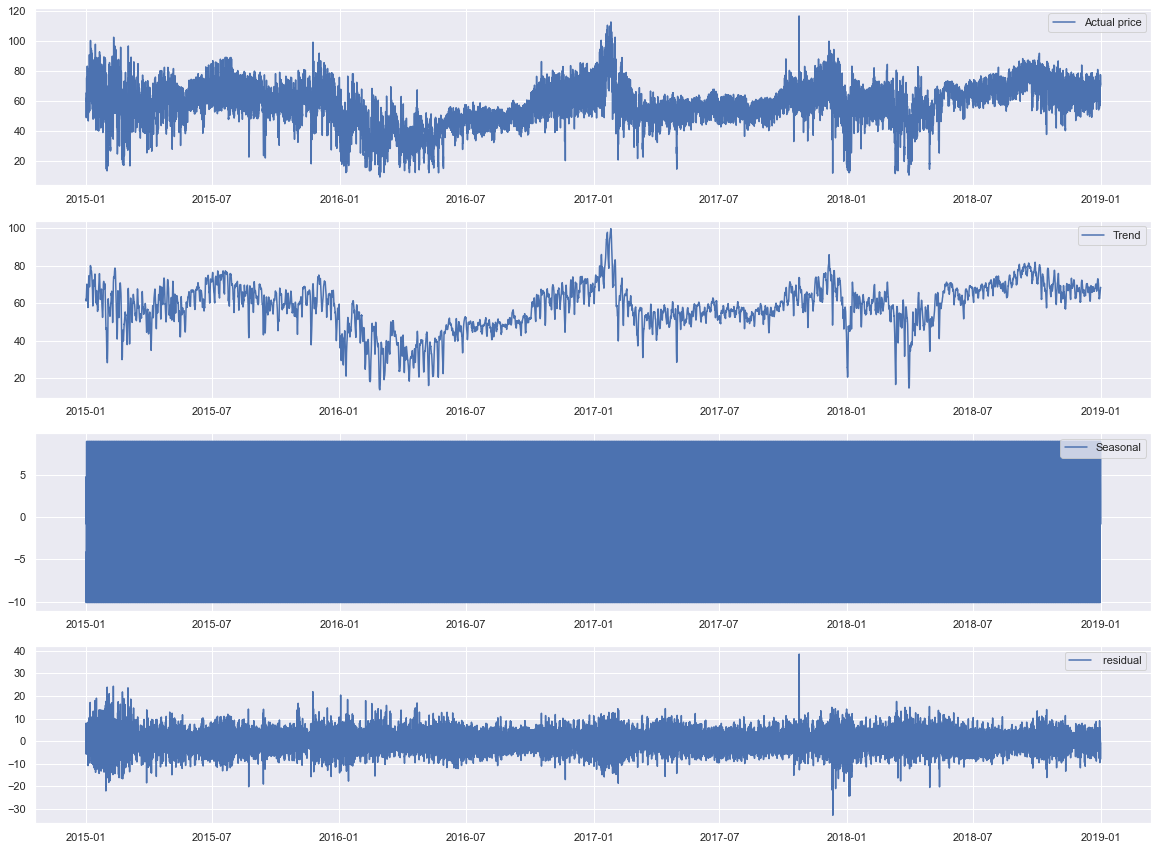

In [133]:
decomposition = seasonal_decompose(energy_df['price actual'], model = 'additive')

observed = decomposition.observed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize = (20, 15))
plt.subplot(4, 1, 1)
plt.plot(observed, label = 'Actual price')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(residual, label = ' residual')
plt.legend(loc = 'best')

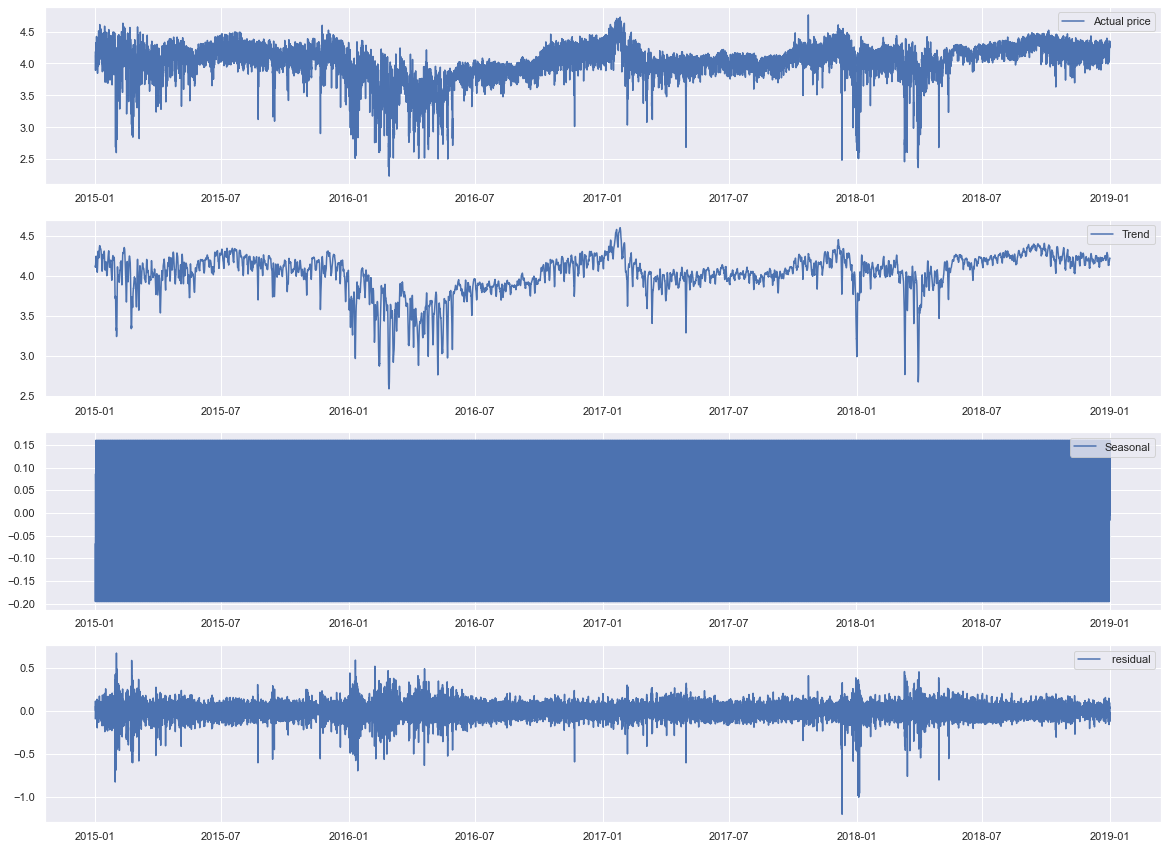

In [134]:
# plotting decompostion of the the log of price actual
decomposition = seasonal_decompose(np.log(energy_df['price actual']), model = 'additive')

log_observed = decomposition.observed
log_trend = decomposition.trend
log_seasonal = decomposition.seasonal
log_residual = decomposition.resid

plt.figure(figsize = (20, 15))
plt.subplot(4, 1, 1)
plt.plot(log_observed, label = 'Actual price')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(log_trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(log_seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(log_residual, label = ' residual')
plt.legend(loc = 'best')

## Testing for stationarity


Looking at the plots above, we can see from the trend, that the price is fairly constant over the years. However, lets check for stationarity mathematically to be sure. 

The Augmented Dickey-Fuller (ADF) test, a type of unit root test, determines how strongly a time series is defined by a trend. Its hypotheses are the following:

Null Hypothesis  𝐻0 : There is a unit root in the time series, i.e. the series is autocorrelated with (r=1), a time dependent structure and thus, is not stationary.

Alternate Hypothesis  𝐻1 : The time series has no unit root and is either stationary or can be made stationary using differencing.



In [147]:
from statsmodels.tsa.stattools import adfuller

In [148]:
adf_result = adfuller(final_df['price actual'])

In [150]:
print('ADF statistic : {:.6f}\n'.format(adf_result[0]),
     'p-value : {:.6f}'.format(adf_result[1]))

ADF statistic : -9.147016
 p-value : 0.000000


In [152]:
for k, v in adf_result[4].items():
    print('Critical value {} : {:.6f}'.format(k, v))

Critical value 1% : -3.430537
Critical value 5% : -2.861623
Critical value 10% : -2.566814


A p value of 0 indicates that we can reject the null hypothesis and hence assume that our time series has no unit root and can be considered stationary.

Now that we have proved that our data is stationary, we can take a look at the autocorrelation and partial auto correlation to see how much of an influence the previous time observations will have on the current observation.

In [153]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

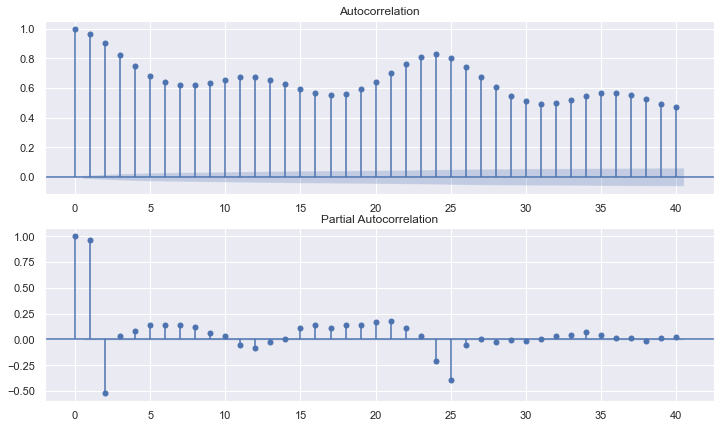

In [155]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (12, 7))
plot_acf(final_df['price actual'], lags = 40, ax = ax1)
plot_pacf(final_df['price actual'], lags = 40, ax = ax2)
plt.show()


While the autocorrelation decreases, the partial auto-correlation shows a strong relationship between the current price and its price at lags = 1, 2, 24, 25. 

## Cross correlation

A cross corrleation of the time price time series with other features, will tell us how the price varies as a function of the feature in the current and the past.Here we plot the cross corrleation between the price and the actual load.

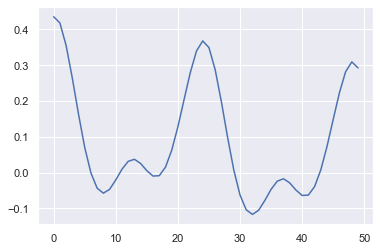

In [156]:
from statsmodels.tsa.stattools import ccf

# Calculating cross correlation

cc_f = ccf(final_df['total load actual'], final_df['price actual'])
plt.plot(cc_f[0:50])
plt.show()

We see that correlation varies greatly for a few specific time lags such as 0, 25, 48. However it is close to 0 for the rest. In any case here we will consider impact of other features on the price as a function of only the present hour.

In [162]:
correlation = final_df.corr(method = 'pearson')
print(correlation['price actual'].sort_values(ascending = False).to_string())

price actual                                   1.000000
price day ahead                                0.732155
generation fossil hard coal                    0.465637
generation fossil gas                          0.461452
total load actual                              0.435253
generation fossil brown coal/lignite           0.363993
generation fossil oil                          0.285050
generation other renewable                     0.255551
pressure_ Barcelona                            0.254772
pressure_Bilbao                                0.194063
generation waste                               0.168710
generation biomass                             0.142671
temp_min_Valencia                              0.133141
pressure_Valencia                              0.109812
temp_min_ Barcelona                            0.103726
generation other                               0.099914
generation solar                               0.098529
temp_max_Madrid                                0

Notice that the price has no correlation with the 'snow_3h_ Barcelona' and 'snow_3h_Seville' and we can drop those two columns

Generation sources related to fossil fuels and coal have a positive correlation on the price. On the other hand, features such as generation due to hydro pumped storage has a negative impact on the price. Weather factors such as wind speed also play a crucial factor in reducing the price. 

In [165]:
final_df.drop(['snow_3h_ Barcelona', 'snow_3h_Seville'], axis = 1, inplace = True)

In [166]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 65 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           35064 non-null  float64
 1   generation fossil brown coal/lignite         35064 non-null  float64
 2   generation fossil gas                        35064 non-null  float64
 3   generation fossil hard coal                  35064 non-null  float64
 4   generation fossil oil                        35064 non-null  float64
 5   generation hydro pumped storage consumption  35064 non-null  float64
 6   generation hydro run-of-river and poundage   35064 non-null  float64
 7   generation hydro water reservoir             35064 non-null  float64
 8   generation nuclear                           35064 non-null  float64
 9   generation other         

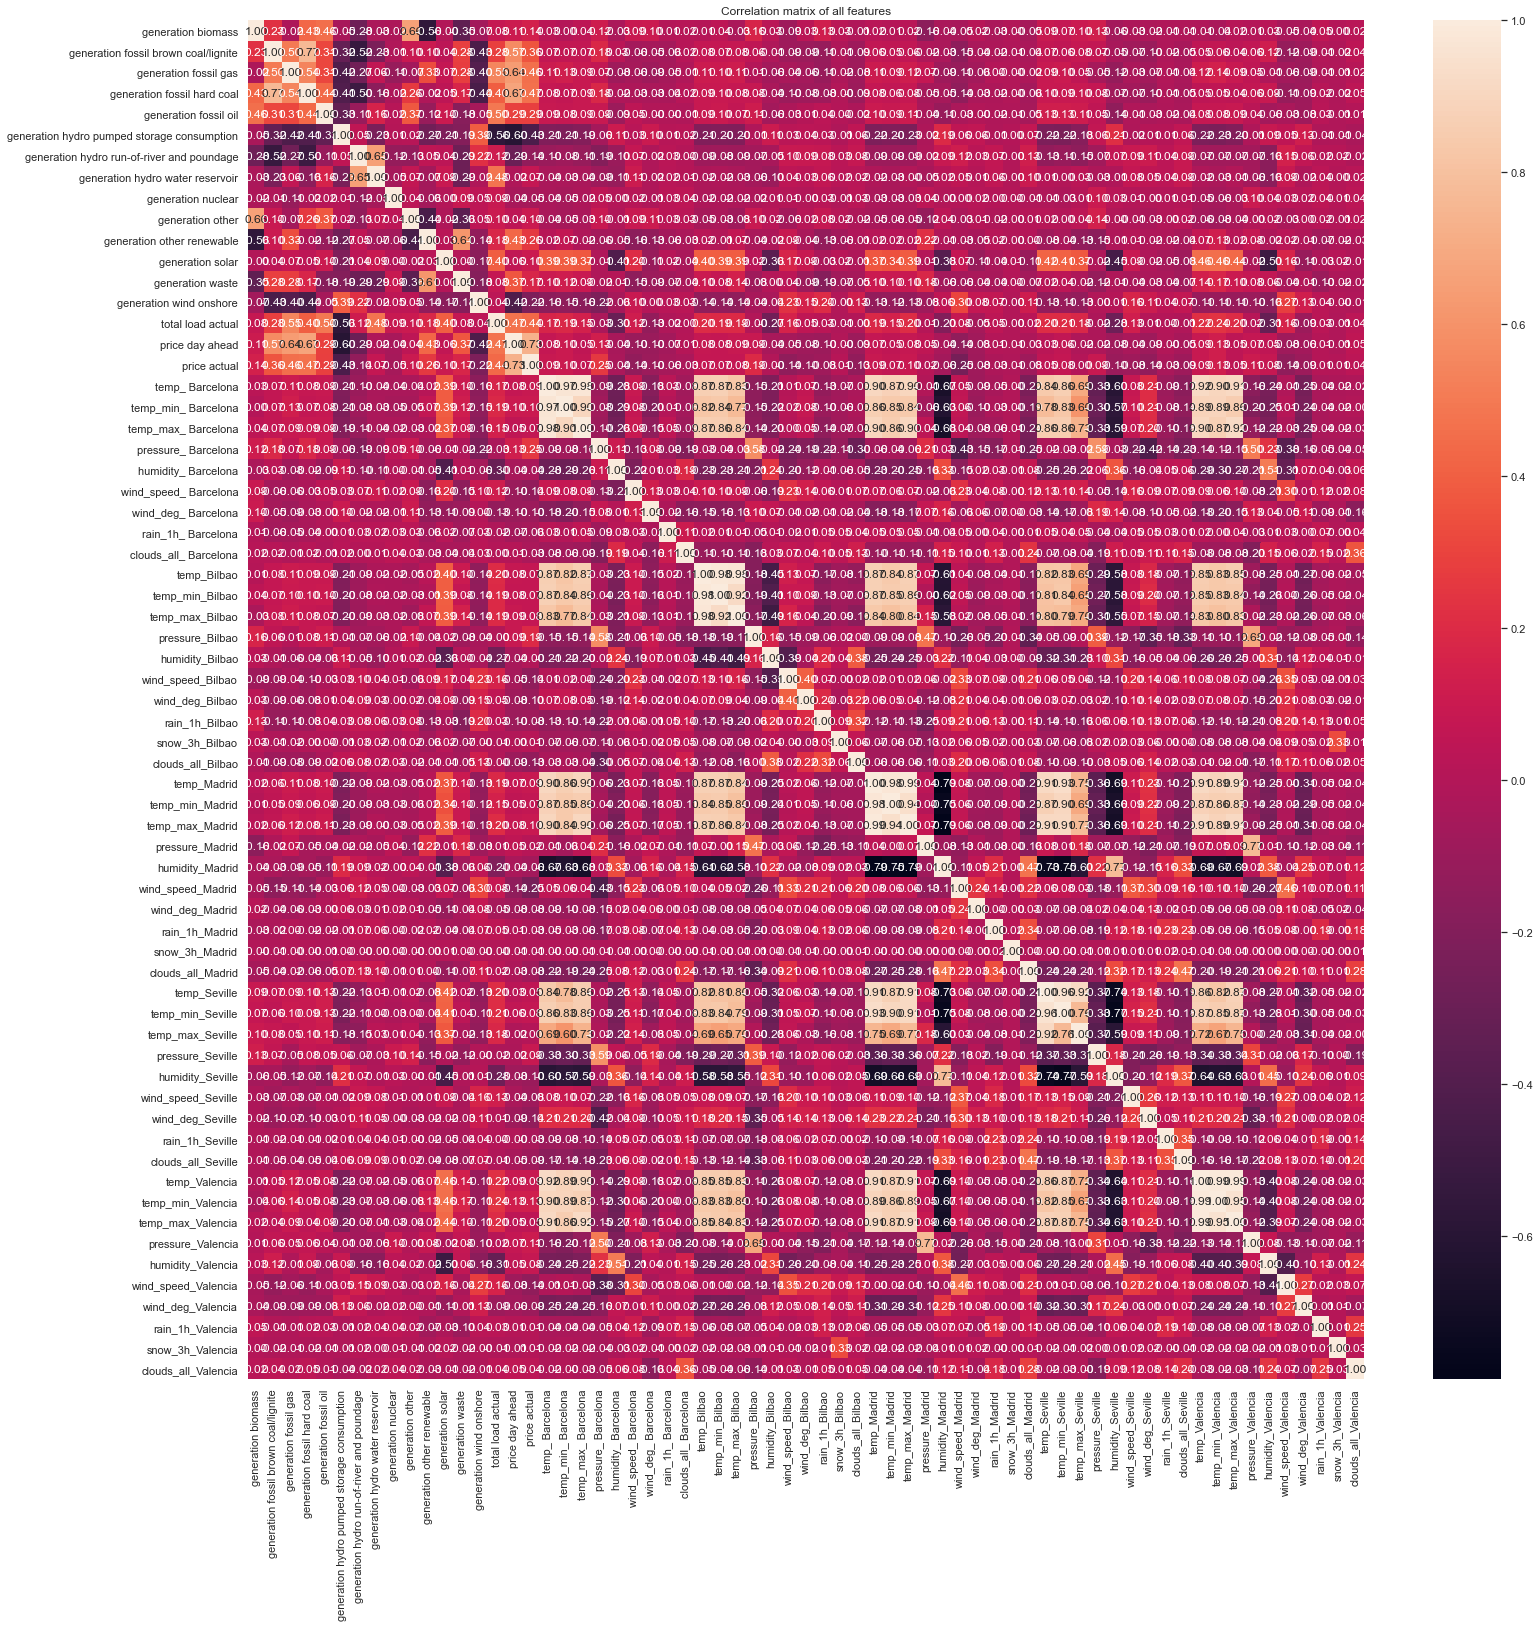

In [167]:
# plotting the heat map for the final df

correlation = final_df.corr(method = 'pearson')
fig = plt.figure(figsize = (25, 25))
sns.heatmap(correlation, annot = True, fmt = '.2f' )
plt.title('Correlation matrix of all features')
plt.show()

While most of the factors seems to have little impact on each other, we some areas of high correlations among the features. 

Lets observe the features with a high correlation

In [180]:
high_corr = abs(correlation > 0.7)
print(correlation[high_corr < 1]['price actual'].sort_values(ascending = False).to_string())

generation fossil hard coal                    0.465637
generation fossil gas                          0.461452
total load actual                              0.435253
generation fossil brown coal/lignite           0.363993
generation fossil oil                          0.285050
generation other renewable                     0.255551
pressure_ Barcelona                            0.254772
pressure_Bilbao                                0.194063
generation waste                               0.168710
generation biomass                             0.142671
temp_min_Valencia                              0.133141
pressure_Valencia                              0.109812
temp_min_ Barcelona                            0.103726
generation other                               0.099914
generation solar                               0.098529
temp_max_Madrid                                0.096279
temp_Valencia                                  0.090505
pressure_Seville                               0

Having analysed our features, we can now move on the the pre processing which will be the next step in the analysis. For now we save the final dataframe we got to be used subsequently. 

In [183]:
final_df.to_csv('energy_weather_price.csv')